In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,24K,2009
1,The Miracle Rider,1935
2,Faust,1960
3,Soul of the Avenger,1997
4,Otoko wa tsurai yo: Boukyou hen,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

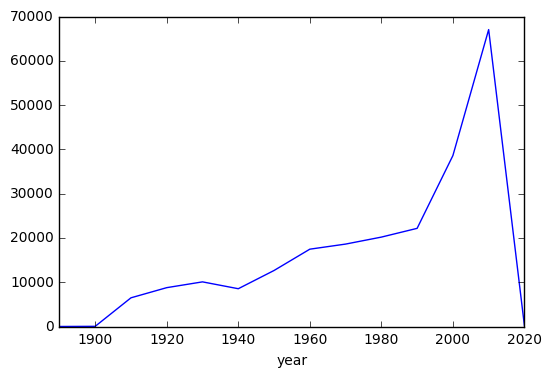

In [11]:
movies = titles.groupby(titles.year//10 * 10).size()
movies.plot('line')

### Use groupby() to plot the number of "Hamlet" films made each decade.

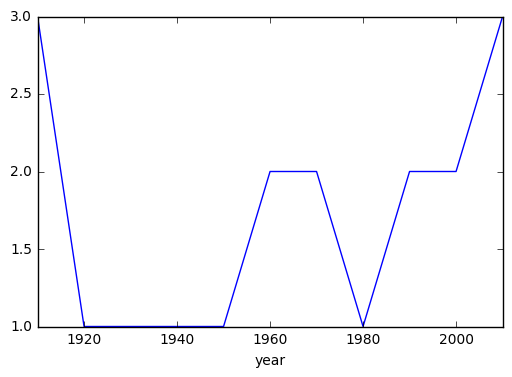

In [12]:
movies = titles[titles.title=="Hamlet"].groupby(titles.year//10 * 10).size()
movies.plot('line')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [15]:
roles = cast[(cast.n==1) & (cast.year//10 == 195)].groupby(['year', 'type', 'n']).size()
roles

year  type     n  
1950  actor    1.0    621
      actress  1.0    279
1951  actor    1.0    647
      actress  1.0    279
1952  actor    1.0    604
      actress  1.0    291
1953  actor    1.0    652
      actress  1.0    300
1954  actor    1.0    632
      actress  1.0    308
1955  actor    1.0    639
      actress  1.0    281
1956  actor    1.0    640
      actress  1.0    304
1957  actor    1.0    734
      actress  1.0    301
1958  actor    1.0    704
      actress  1.0    292
1959  actor    1.0    719
      actress  1.0    316
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [24]:
cast[(cast.n>=1) & (cast.n<=5) & (cast.year//10 == 195)].groupby(['type', 'n']).size()

type     n  
actor    1.0    6592
         2.0    4546
         3.0    5569
         4.0    5576
         5.0    5590
actress  1.0    2951
         2.0    4538
         3.0    3134
         4.0    2836
         5.0    2540
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [23]:
cast[cast.title.str.contains('Pink Panther')].groupby(['year', 'title']).size()

year  title                         
1963  The Pink Panther                  19
1975  The Return of the Pink Panther    30
1976  The Pink Panther Strikes Again    68
1978  Revenge of the Pink Panther       64
1982  Trail of the Pink Panther         41
1983  Curse of the Pink Panther         67
1993  Son of the Pink Panther           46
2006  The Pink Panther                  90
2009  The Pink Panther 2                83
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [42]:
cast[(cast.name == 'Frank Oz')].groupby(['year', 'title']).filter(lambda x: len(x)>1).groupby(['title', 'year']).size()

title                                 year
An American Werewolf in London        1981    2
Follow That Bird                      1985    3
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
The Dark Crystal                      1982    2
The Great Muppet Caper                1981    6
The Muppet Christmas Carol            1992    7
The Muppet Movie                      1979    8
The Muppets Take Manhattan            1984    7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [50]:
cast[(cast.name == 'Frank Oz')].groupby(['character']).filter(lambda x: len(x)>1).groupby('character').size()

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64